In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

ay = pd.read_csv('hf://datasets/lukebarousse/data_jobs/data_jobs.csv')

ay['job_posted_date'] = pd.to_datetime (ay['job_posted_date'])

ay['job_skills']= ay['job_skills'].apply(lambda skill_list: 
                                         ast.literal_eval(skill_list) 
                                         if pd.notna (skill_list) else skill_list)

c:\Users\EMMANUEL\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
'(MaxRetryError('HTTPSConnectionPool(host=\'cdn-lfs-us-1.hf.co\', port=443): Max retries exceeded with url: /repos/2b/6f/2b6fc10e0fe0d50fa34bd88e583506eb0c7f9c7f747da8ad91c250c86653d4ce/635241ed09ccee18bdae1f83b45f26d6759e0aa2513c529f6190e9054062436c?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27data_jobs.csv%3B+filename%3D%22data_jobs.csv%22%3B&response-content-type=text%2Fcsv&Expires=1744703285&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0NDcwMzI4NX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zLzJiLzZmLzJiNmZjMTBlMGZlMGQ1MGZhMzRiZDg4ZTU4MzUwNmViMGM3ZjljN2Y3NDdkYThhZDkxYzI1MGM4NjY1M2Q0Y2UvNjM1MjQxZWQwOWNjZWUxOGJkYWUxZjgzYjQ1ZjI2ZDY3NTllMGFhMjU

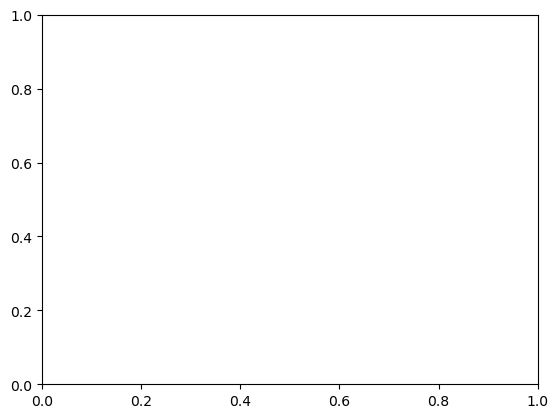

In [2]:
fig, ax = plt.subplots()

<Axes: ylabel='job_title_short'>

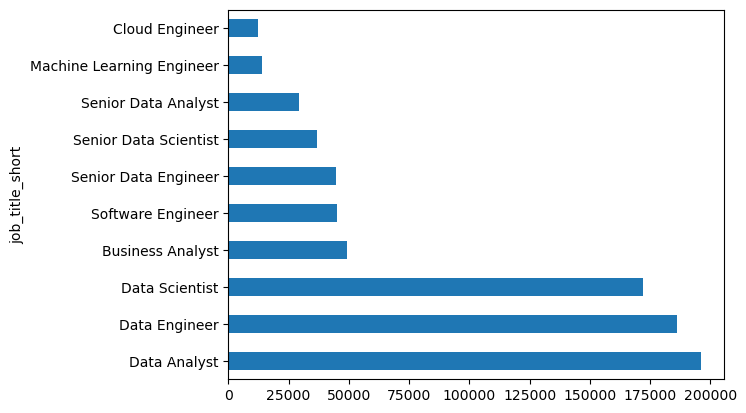

In [3]:
ay['job_title_short'].value_counts().plot(kind='barh')

In [4]:
ay['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

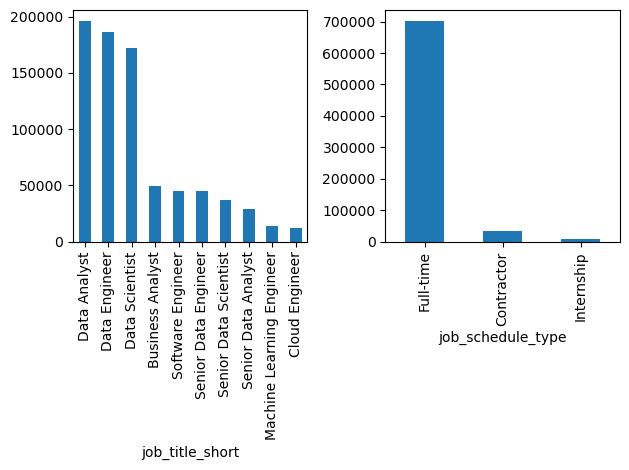

In [5]:
fig, ax = plt.subplots(1,2)

ay['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
ay['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

fig.tight_layout()

In [6]:
ay_skills= ay.copy()
ay_skills= ay_skills.explode('job_skills')
skills_count= ay_skills.groupby(['job_skills', 'job_title_short']).size()
ay_skills_count= skills_count.reset_index(name='skill_count')
ay_skills_count.sort_values(by='skill_count',ascending=False, inplace=True)

ay_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [7]:
job_title = ['Data Scientist','Data Engineer','Data Analyst']

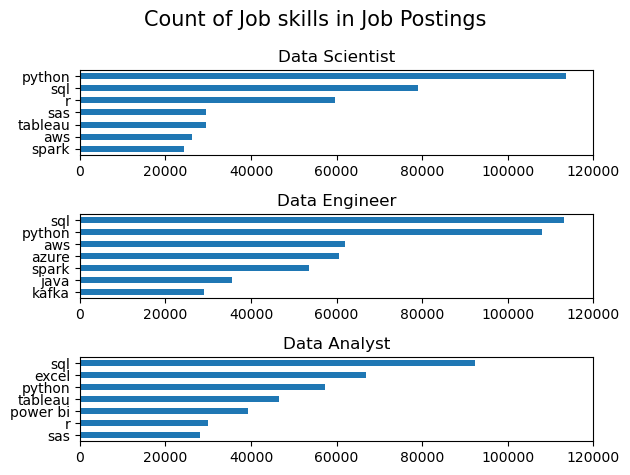

In [8]:
fig, ax = plt.subplots (3,1)

for i, job_titles in enumerate (job_title):
    ay_plot = ay_skills_count[ay_skills_count['job_title_short'] == job_titles].head(7)
    ay_plot.plot(kind= 'barh',x='job_skills',y='skill_count',ax=ax[i], title= job_titles)
    ax[i].invert_yaxis ()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)
fig.suptitle ('Count of Job skills in Job Postings',fontsize= 15)
fig.tight_layout()

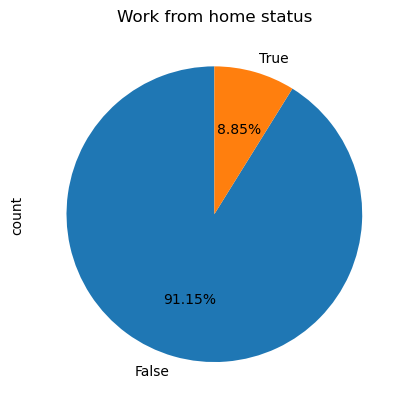

In [9]:
ay['job_work_from_home'].value_counts().plot(kind='pie',startangle= 90, autopct='%1.2f%%')
plt.title ('Work from home status')
plt.show()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64


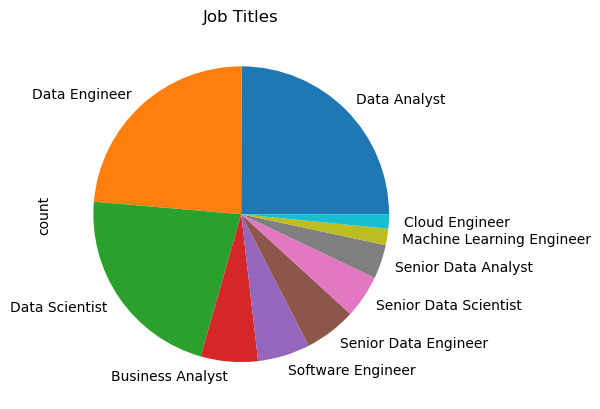

In [10]:
print (ay['job_title_short'].value_counts())
ay['job_title_short'].value_counts().plot(kind='pie')
plt.title ('Job Titles')
plt.show()

In [11]:
ay[['job_work_from_home', 'job_no_degree_mention','job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


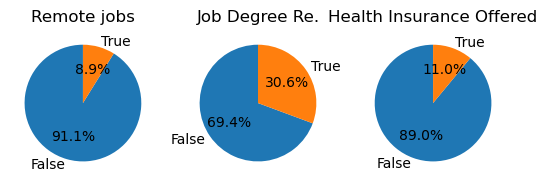

In [12]:
fig, ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home':'Remote jobs',
    'job_no_degree_mention':'Job Degree Re.',
    'job_health_insurance':'Health Insurance Offered'
}

for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(ay[column].value_counts(), labels= (['False', 'True']), startangle= 90, autopct='%1.1f%%')
    ax[i].set_title (title)

plt.show()

In [13]:
ayDA = ay[ay['job_title_short']== 'Data Analyst'].copy()

In [14]:
ayDA_explode = ayDA.explode('job_skills')

ayDA_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}"
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [15]:
ayDA_explode['job_skills'].value_counts()

job_skills
sql          92428
excel        66860
python       57190
tableau      46455
power bi     39380
             ...  
capacitor        1
gtx              1
ovh              1
esquisse         1
chainer          1
Name: count, Length: 235, dtype: int64

In [16]:
ayDA_UK= ayDA[ayDA['job_country']== 'United Kingdom']

In [17]:
ayDA_UKexpl = ayDA_UK.explode('job_skills')

ayDA_UKexpl['job_skills'].value_counts()

job_skills
sql          4467
excel        4274
power bi     2853
python       2118
tableau      1637
             ... 
flutter         1
datarobot       1
nuix            1
workfront       1
laravel         1
Name: count, Length: 167, dtype: int64

In [18]:
#ayDA_explode['job_skills'].value_counts(ascending=True)
skill_stats = ayDA_explode.groupby('job_skills').agg (
    skill_count= ('job_skills', 'count'),
    median_salary= ('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

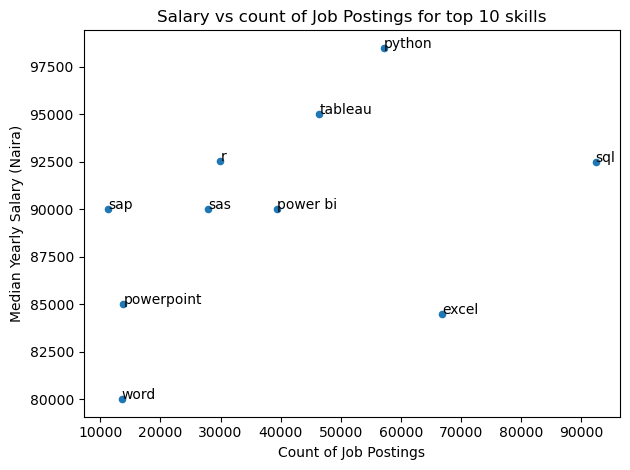

In [19]:
skill_stats.plot(kind='scatter', x= 'skill_count', y= 'median_salary')
plt.xlabel ('Count of Job Postings')
plt.ylabel ('Median Yearly Salary (Naira)')
plt.title ('Salary vs count of Job Postings for top 10 skills')
plt.tight_layout ()

for i, text in enumerate (skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], text)
plt.show()

In [20]:
for i, text in enumerate (skill_stats.index):
    print (i, text)
    

0 sql
1 excel
2 python
3 tableau
4 power bi
5 r
6 sas
7 powerpoint
8 word
9 sap


In [21]:
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


In [22]:
skill_stats = ayDA_explode.groupby('job_skills').agg (
    skill_count= ('job_skills', 'count'),
    median_salary= ('salary_year_avg', 'median')
)

headcount= 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(headcount)
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


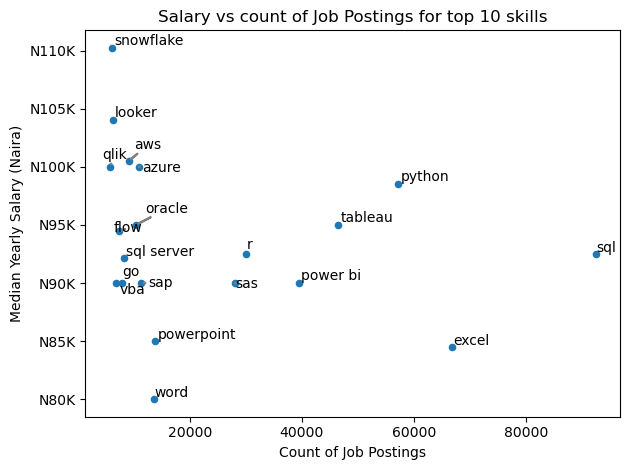

In [23]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x= 'skill_count', y= 'median_salary')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda t, pos: f'N{int (t/1000)}K'))

plt.xlabel ('Count of Job Postings')
plt.ylabel ('Median Yearly Salary (Naira)')
plt.title ('Salary vs count of Job Postings for top 10 skills')
plt.tight_layout ()

texts = []

for i, text in enumerate (skill_stats.index):
    texts.append (plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], text))

adjust_text(texts, arrowprops= dict (color='gray',lw=1.5))
plt.show()

In [24]:
ay_DA_US = ay[(ay['job_title_short']=='Data Analyst') & (ay['job_country']=='United States')].copy()

ay_DA_US['salary_year_avg']

36       NaN
68       NaN
73       NaN
79       NaN
93       NaN
          ..
785603   NaN
785626   NaN
785685   NaN
785703   NaN
785705   NaN
Name: salary_year_avg, Length: 67816, dtype: float64

Text(0, 0.5, 'Number of Jobs')

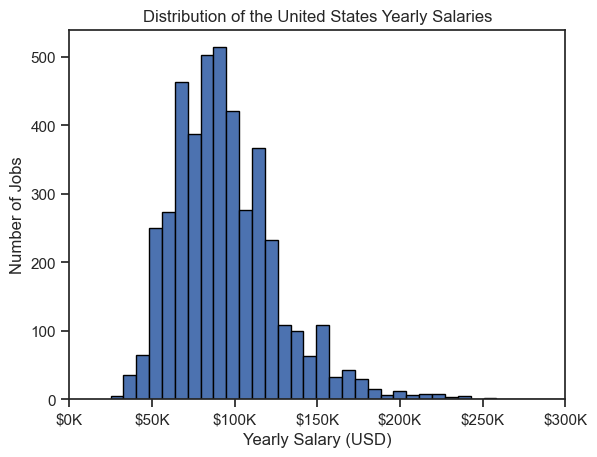

In [43]:
ay_DA_US['salary_year_avg'].plot(kind="hist", bins= 45, edgecolor= 'black')
plt.xlim(0,300000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda t, pos: f'${int (t/1000)}K'))

plt.title('Distribution of the United States Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')

In [26]:
ay_DA_US = ay_DA_US.dropna (subset= 'salary_year_avg')

ay_DA_US['salary_year_avg'].sample(10)

306003     87500.0
151601     90000.0
632972    150000.0
587535     80000.0
18059      54000.0
746900    117550.0
724164    107000.0
324610    138615.0
277375     50500.0
727158     87500.0
Name: salary_year_avg, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x23bd7668890>,
 'caps': [<matplotlib.lines.Line2D at 0x23bd7669c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x23bd6212210>],
 'medians': [<matplotlib.lines.Line2D at 0x23bd766ae10>],
 'fliers': [<matplotlib.lines.Line2D at 0x23bd766b7d0>],
 'means': []}

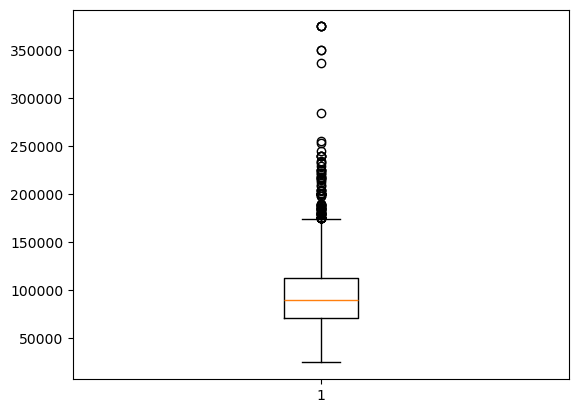

In [27]:
#ay_DA_US['salary_year_avg'].plot(kind='box') OR

plt.boxplot (ay_DA_US['salary_year_avg'])

<Axes: >

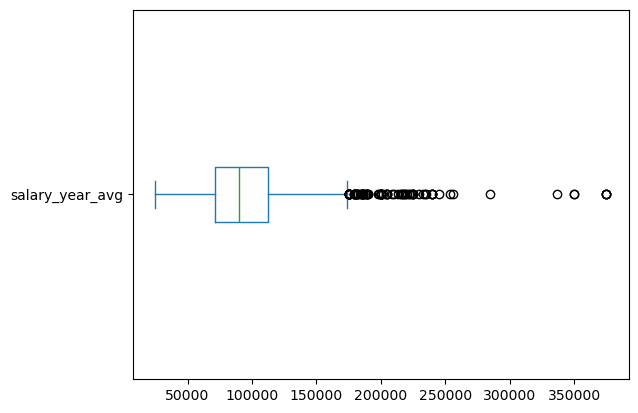

In [28]:
ay_DA_US['salary_year_avg'].plot(kind='box', vert=False)
#ax = plt.gca()
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda t, pos: f'${int (t/1000)}K'))

C:\Users\EMMANUEL\AppData\Local\Temp\ipykernel_8996\357743449.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_summary, vert=False) #labels not label


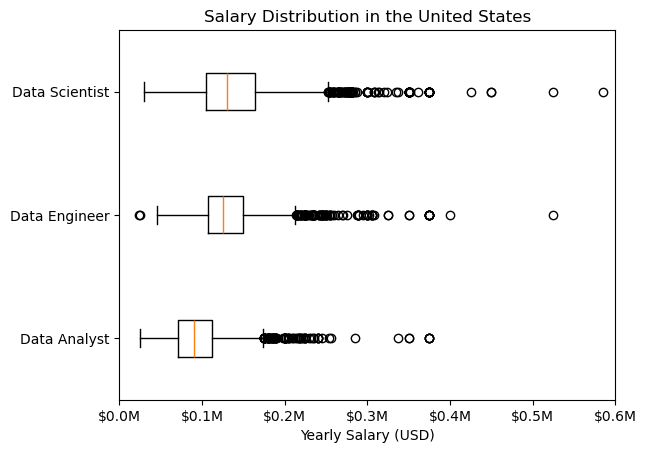

In [29]:
job_summary = ['Data Analyst', 'Data Engineer', 'Data Scientist']

ay_US = ay[(ay['job_title_short'].isin (job_summary)) & (ay['job_country']=='United States')].copy()

ay_US = ay_US.dropna(subset='salary_year_avg')

job_list = [ay_US[ay_US['job_title_short'] == top_job] ['salary_year_avg'] for top_job in job_summary]

plt.boxplot(job_list, labels=job_summary, vert=False) #labels not label
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim (0, 600000)
ax = plt.gca() #gca - get current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda z, pos: f'${z/1000000:.1f}M'))
plt.show()

In [30]:
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64

In [31]:
US_DAexpl= ay_DA_US.explode('job_skills')

US_DAexpl[['salary_year_avg','job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [32]:
US_DAexp_desc = US_DAexpl.groupby('job_skills')['salary_year_avg'].describe()

US_DAexp_desc

,count,mean,std,min,25%,50%,75%,max
job_skills,,,,,,,,
airflow,44.0,122718.261364,50955.537067,52200.0,90225.0,116250.00,137581.250000,375000.000000
airtable,5.0,87007.500000,13022.587349,65037.5,90000.0,90000.00,90000.000000,100000.000000
alteryx,106.0,107759.689121,31647.367241,54000.0,85000.0,106281.25,125000.000000,225000.000000
angular,8.0,101068.500000,38285.232569,50000.0,64500.0,107500.00,138516.000000,138516.000000
ansible,1.0,159640.000000,NaN,159640.0,159640.0,159640.00,159640.000000,159640.000000
...,...,...,...,...,...,...,...,...
wire,4.0,68375.000000,17693.572279,42500.0,65750.0,74250.00,76875.000000,82500.000000
word,461.0,83448.896556,28881.756123,32500.0,64000.0,81194.75,100000.000000,375000.000000
workfront,3.0,76820.036458,12827.263616,65000.0,70000.0,75000.00,82730.054688,90460.109375


In [34]:
US_DAexp_toppay = US_DAexp_desc.sort_values(by='50%', ascending=False).head(10)

US_DAexp_toppay =  US_DAexp_toppay[['count', '50%']]

US_DAexp_toppay

,count,50%
job_skills,,
dplyr,2.0,196250.0
bitbucket,3.0,189000.0
gitlab,3.0,186000.0
solidity,1.0,179000.0
hugging face,1.0,175000.0
couchbase,1.0,160515.0
ansible,1.0,159640.0
mxnet,2.0,149000.0
cassandra,6.0,148250.0


In [35]:
US_DAexp_skills = US_DAexp_desc.sort_values(by='count', ascending=False).head(10)

US_DAexp_skills = US_DAexp_skills.sort_values(by='50%',ascending=False)

US_DAexp_skills = US_DAexp_skills[['count', '50%']]

US_DAexp_skills

,count,50%
job_skills,,
python,1431.0,97500.00
tableau,1364.0,92875.00
r,893.0,92500.00
sql server,286.0,92500.00
sql,2508.0,91000.00
sas,926.0,90000.00
power bi,838.0,90000.00
powerpoint,462.0,85000.00
excel,1808.0,84392.00


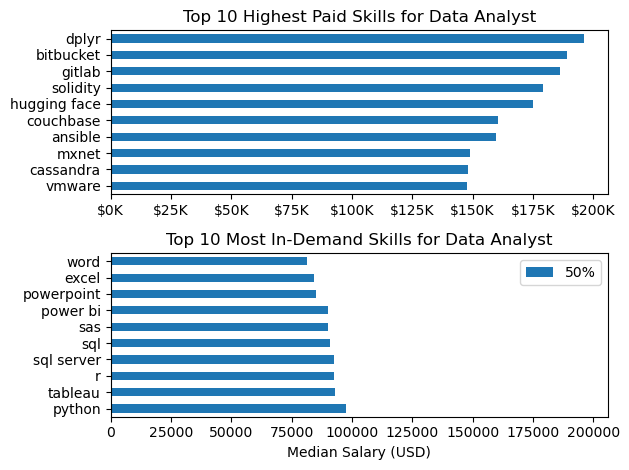

In [36]:
fig, ax = plt.subplots(2,1)

US_DAexp_toppay.plot(kind='barh', y='50%', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title ('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel ('')
ax[0].set_xlabel ('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda z, pos: f'${int (z/1000)}K'))

US_DAexp_skills.plot(kind='barh', y='50%', ax=ax[1])
ax[1].set_title ('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].set_ylabel ('')
ax[1].set_xlabel ('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) #to balance the x_axis on both plots

plt.tight_layout () 
#OR 'fig.tight_layout ()' to avoid overlapping

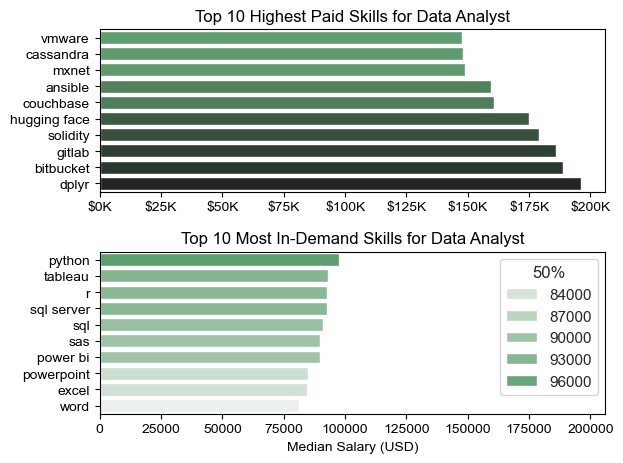

In [37]:
import seaborn as sns

fig, ax = plt.subplots(2,1)

sns.set_theme (style='ticks')
#explore seaborn library for other colors and format options

sns.barplot(data=US_DAexp_toppay, x='50%', y=US_DAexp_toppay.index, ax=ax[0], hue='50%', palette='dark:g_r') #g for green
ax[0].legend().remove()
#US_DAexp_toppay.plot(kind='barh', y='50%', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title ('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel ('')
ax[0].set_xlabel ('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda z, pos: f'${int (z/1000)}K'))

sns.barplot(data=US_DAexp_skills, x='50%', y=US_DAexp_skills.index, ax=ax[1], hue='50%', palette='light:g')
#US_DAexp_skills.plot(kind='barh', y='50%', ax=ax[1])
ax[1].set_title ('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].set_ylabel ('')
ax[1].set_xlabel ('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) #to balance the x_axis on both plots

plt.tight_layout () 
#OR 'fig.tight_layout ()' to avoid overlapping
plt.show()

Text(12.444444444444445, 0.5, 'Number of Jobs')

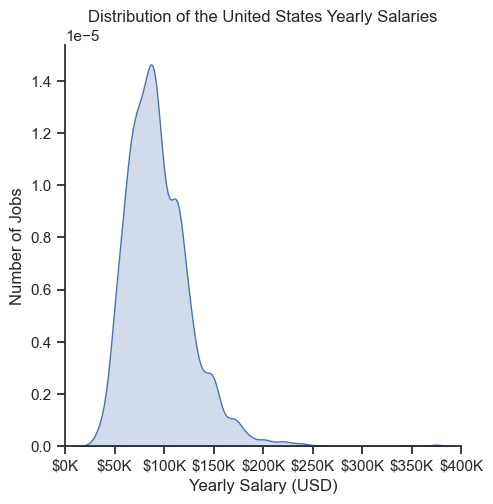

In [41]:
sns.displot(ay_DA_US['salary_year_avg'], kind='kde', fill=True) #kde=kernel density estimation

plt.xlim(0,400000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda t, pos: f'${int (t/1000)}K'))

plt.title('Distribution of the United States Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')

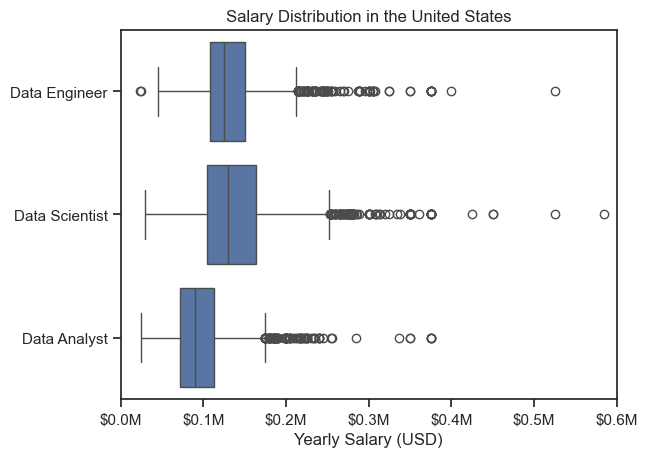

In [46]:
sns.boxplot(data=ay_US, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution in the United States')
plt.ylabel("")
plt.xlabel('Yearly Salary (USD)')
plt.xlim (0, 600000)
ax = plt.gca() #gca - get current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda z, pos: f'${z/1000000:.1f}M'))
plt.show()